In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print('슝=3')

슝=3


In [2]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) #

In [3]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/dog.png'
segvalues, output = model.segmentAsPascalvoc(img_path)

In [4]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3
    
target = colormap[12] # dog 12 array([ 64,   0, 128])
colormap[15] # man 15 array([192, 128, 128])


array([192, 128, 128])

In [5]:
seg_color = (target[2],target[1],target[0])
seg_map = np.all(output==seg_color, axis=-1) 

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

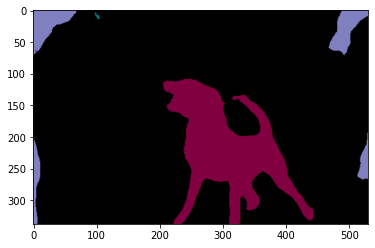

In [6]:
plt.imshow(output)
plt.show()

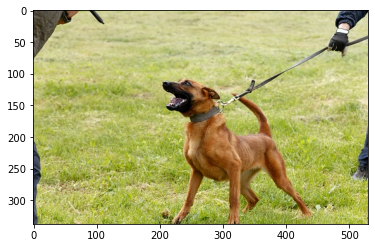

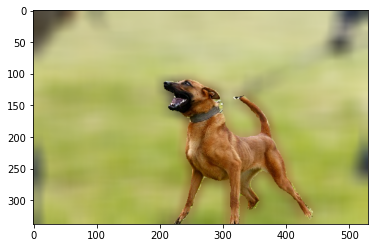

In [7]:
# Q. 이번에는 사람 부분을 블러로, 배경 부분을 원본으로 출력해볼까요?
# 힌트 : img_mask_color 옵션을 적절히 조정해주고, img_orig, img_orig_blur 를 활용하세요.
img_orig = cv2.imread(img_path) 
img_show = img_orig.copy()
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()
img_orig_blur  = cv2.blur(img_orig, (30,30))
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.png'
segvalues, output = model.segmentAsPascalvoc(img_path)

In [9]:
target = colormap[15] # man 15 array([192, 128, 128])

seg_color = (target[2],target[1],target[0])
seg_map = np.all(output==seg_color, axis=-1) 

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

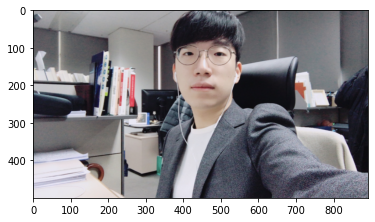

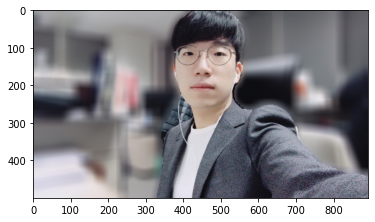

In [10]:
# Q. 이번에는 사람 부분을 블러로, 배경 부분을 원본으로 출력해볼까요?
# 힌트 : img_mask_color 옵션을 적절히 조정해주고, img_orig, img_orig_blur 를 활용하세요.
img_orig = cv2.imread(img_path) 
img_show = img_orig.copy()
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()
img_orig_blur  = cv2.blur(img_orig, (30,30))
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [21]:
dog_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/dog.png'
road_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/road.png'

dog_orig = cv2.imread(dog_path) 
road_orig = cv2.imread(road_path) 

road_height, road_width = road_orig.shape[:2]
dog_resized = cv2.resize(dog_orig, (road_width, road_height))

print(dog_resized.shape)
print(road_orig.shape)

# segvalues, output = model.segmentAsPascalvoc(img_path)

(440, 662, 3)
(440, 662, 3)


In [24]:
segvalues, output = model.segmentAsPascalvoc(dog_path)
dog_resized_output = cv2.resize(output, (road_width, road_height))

In [25]:
target = colormap[12] # man 15 array([192, 128, 128])

seg_color = (target[2],target[1],target[0])
seg_map = np.all(dog_resized_output==seg_color, axis=-1) 

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

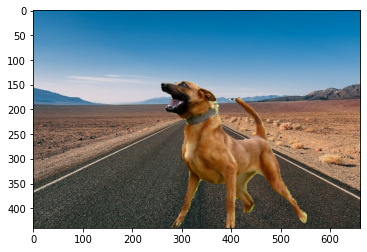

In [26]:
img_concat = np.where(img_mask_color==255, dog_resized, road_orig)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [27]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/brown_dog.png'
segvalues, output = model.segmentAsPascalvoc(img_path)

In [28]:
target = colormap[12] # man 15 array([192, 128, 128])

seg_color = (target[2],target[1],target[0])
seg_map = np.all(output==seg_color, axis=-1) 

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

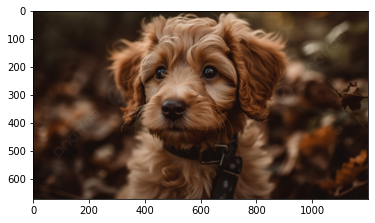

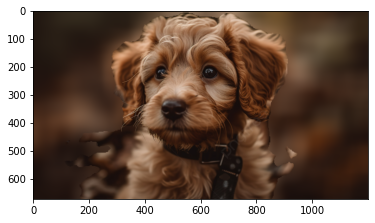

In [30]:
# Q. 이번에는 사람 부분을 블러로, 배경 부분을 원본으로 출력해볼까요?
# 힌트 : img_mask_color 옵션을 적절히 조정해주고, img_orig, img_orig_blur 를 활용하세요.
img_orig = cv2.imread(img_path) 
img_show = img_orig.copy()
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()
img_orig_blur  = cv2.blur(img_orig, (100,100))
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

위 사진에서 갈색 배경까지 같이 개로 식별되었다. 저 부분이 문제이다.


# 회고

일단 사진을 아웃포커싱하는 구현을 해보았다.
segvalues, output = model.segmentAsPascalvoc(img_path)을 이용하여 사진 속의 각 대상을 세그먼테이션할 수 있었다.
output의 색을 이용하여 각 대상을 필터할 수 있는 필터를 만들고 필터의 영역을 선명하게 그외 영역은 흐리게 만들어 대상을 아웃포커싱할 수 있었다.

개선할 수 있는 솔루션을 생각하지 못한 것은 아쉬운 점이다. 구현에 시간을 많이 사용하여 솔루션을 생각할 시간이 없었다.
이제 대상을 세그먼테이션하는 알고리즘을 학습할 것인데 궁금하다. 